# Draw atari on progress.csv files 

In [1]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
sns.set(color_codes=True)
import os
import pandas as pd
import numpy as np
import ast

In [27]:
def get_data(log_dirs, name_func=None, smooth_keys=[], min_length=False, smooth_lenght=25):
    split_char = '_'
    df = pd.DataFrame()
    row_nums = {}
    dfs = []

    for log_dir in log_dirs:
        for f_name in os.listdir(log_dir):
            if name_func is not None and not name_func(f_name):
                continue
            name_list = f_name.split(split_char)
            if 'seed' in name_list[-1]:
                base_name = split_char.join(name_list[:-1])
                file_path = os.path.join(log_dir, f_name, 'progress.csv')
                #             print('start:{}'.format(file_path))
                try:
                    df_tmp = pd.read_csv(file_path)
                except:
                    continue
                row_num = df_tmp.shape[0]
                row_nums[f_name] = row_num
                df_tmp['base_name'] = [base_name] * row_num
                df_tmp['full_name'] = [f_name] * row_num

                for k in smooth_keys:
                    if k in df_tmp.keys():
                        df_tmp[k] = df_tmp[k].rolling(smooth_lenght).mean()

                #         df = pd.concat([df, df_tmp], sort=False)
                dfs.append(df_tmp)
                print('Done:{},rows:{}'.format(file_path, row_num))

    min_row_num = min(row_nums.values())
    for d in dfs:
        if min_length:
            df = pd.concat([df, d.head(min_row_num)], ignore_index=True, sort=False)
        else:
            df = pd.concat([df, d], ignore_index=True, sort=False)

    print('rows:', min_row_num)

    return df


def draw(df, keys, name, xlabel=None, ylabel=None):
    for k in keys:
        fig = plt.figure()
        fig.set_tight_layout(True)
#         fig.set_size_inches(14, 5)  # big
        fig.set_size_inches(3, 2.5)

        # ax = sns.lineplot(x='n_updates', y='eprew', hue='base_name',ci=80, n_boot=24, data=df)
#         ax = sns.lineplot(x='n_updates', y=k, hue='base_name', data=df)
        ax = sns.lineplot(x='n_updates', y=k, hue='base_name', ci=40, data=df, n_boot=1, )
        if name is not None:
            ax.set_title(name)
        
#         handles, labels = ax.get_legend_handles_labels()
#         ax.legend(handles=handles[1:], labels=labels[1:], ncol=len(labels[1:]), loc='upper center', bbox_to_anchor=(0.5, 1.5))
        
        if xlabel is not None or ylabel is not None:
            ax.set(xlabel=xlabel, ylabel=ylabel)
        ax.set(xticks=np.arange(0, 10250, 5000))
        sns.set(font_scale=0.7)
        
#         fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/tmp.pdf')


<IPython.core.display.Javascript object>


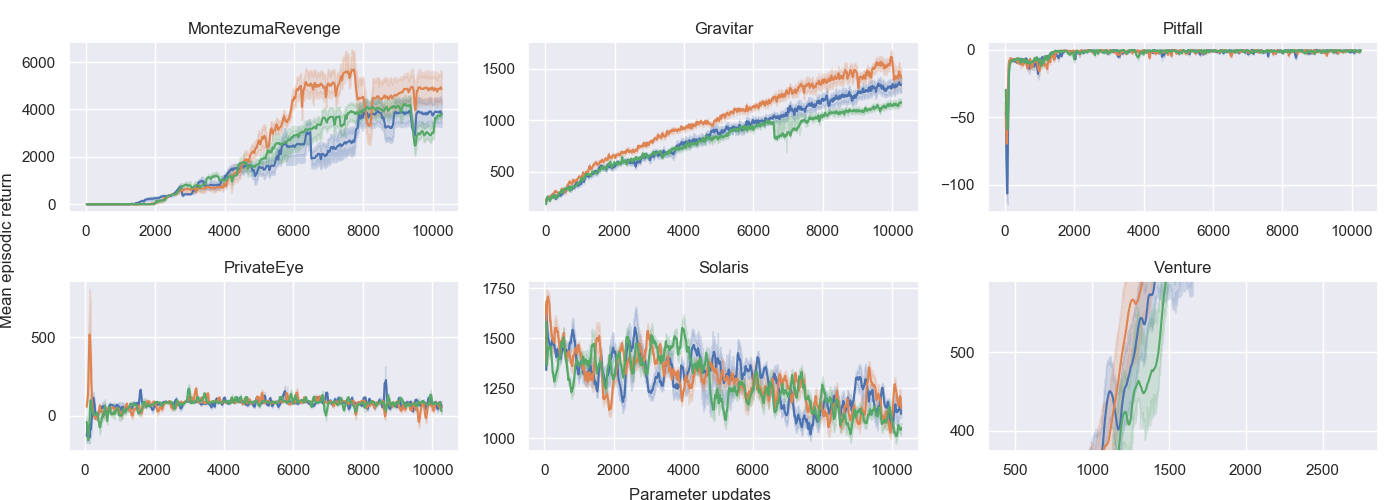

Done:logs/mtzm/rnd_baselineCnn_env32_seed4/progress.csv,rows:10260
Done:logs/mtzm/rnd_baselineCnn_env32_seed1/progress.csv,rows:10258
Done:logs/mtzm/rnd_baselineCnn_env32_seed0/progress.csv,rows:10259
Done:logs/mtzm/rnd_baselineCnn_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/rnd_baselineCnn_env32_seed2/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10259
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_see

/home/songyan/Program/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Done:logs/gravitar/rnd_baselineCnn_env32_seed4/progress.csv,rows:10256
Done:logs/gravitar/rnd_baselineCnn_env32_seed1/progress.csv,rows:10256
Done:logs/gravitar/rnd_baselineCnn_env32_seed0/progress.csv,rows:10256
Done:logs/gravitar/rnd_baselineCnn_env32_seed3/progress.csv,rows:10256
Done:logs/gravitar/rnd_baselineCnn_env32_seed2/progress.csv,rows:10257
Done:logs/gravitar/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10257
Done:logs/gravitar/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10256
Done:logs/gravitar/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10256
Done:logs/gravitar/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10256
Done:logs/gravitar/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10256
Done:logs/gravitar/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10257
Done:logs/gravitar/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows:10256
Done:logs/gravita

In [115]:
log_dirs = [
    'logs/mtzm',
    'logs/mtzm/l2nor',
#     'logs/mtzm/sdnor',
#     'logs/mtzm/logits_ab',
#     'logs/gravitar'
]

log_dirs = [
    'logs/mtzm',
    'logs/mtzm/l2nor',
#     'logs/gravitar',
#     'logs/gravitar/l2nor',
#     'logs/pitfall',
#     'logs/pitfall/l2nor',
#     'logs/privateEye',
#     'logs/privateEye/l2nor',
#     'logs/solaris',
#     'logs/solaris/l2nor',
#     'logs/venture',
#     'logs/venture/l2nor',
]


game_name_map = {'mtzm': 'MontezumaRevenge',
           'gravitar': 'Gravitar',
           'privateEye': 'PrivateEye',
           'venture': 'Venture',
           'pitfall': 'Pitfall',
           'solaris': 'Solaris'}

run_name_map = {
    'rnd_baselineCnn_env32': 'RND',
    'l2nor_allcol0.01_abc1_arrayAction1_env32': 'Action balance RND(one-hot) + channel',
    'l2nor_abc1_arrayAction0_env32': 'Action balance RND(one-hot)',
}

run_name_map_entropy = {
    'l2nor_allcol0.01_abc1_arrayAction1_env32': 'Channel + L2',
    'l2nor_abc1_arrayAction0_env32': 'L2 normalize',
    'cnn_abc0.1_arrayAction0_env32': 'Raw'
}

def name_func(name):
    if 'run2' in name:
        return False
#     return 'env32' in name
#     return 'env32' in name and ('abc0.5_' in name or 'abc1_' in name )
    
    # draw rew
    return 'rnd_baselineCnn_env32' in name or 'l2nor_allcol0.01_abc1_arrayAction1_env32' in name or 'l2nor_abc1_arrayAction0_env32' in name
    # compare entropy
#     return 'l2nor_allcol0.01_abc1_arrayAction1_env32' in name or 'l2nor_abc1_arrayAction0_env32' in name or 'cnn_abc0.1_arrayAction0_env32' in name
#     return 'l2nor_allcol0.01_abc1_arrayAction1_env32' in name or 'sdnor_allcol0.01_abc0.01_' in name

def check_num(df_data, num):
    sta_dict = {}
    for fn in df_data.full_name.unique():
        name_tmp  = ''.join(fn.split('_')[:-1])
        if name_tmp not in sta_dict:
            sta_dict[name_tmp] = 0
        sta_dict[name_tmp] += 1
    if not np.all(np.array(list(sta_dict.values())) == num):
        print(sta_dict)
        raise ValueError('Num not equal!')
    
# sns.set(font_scale=1.0)

keys = []
# keys.extend(['eprew'])
# keys.extend(['loss/entropy_ab'])
keys.extend(['loss/auxloss_ab'])

# for ld in log_dirs:
#     if 'mtzm' in ld:
#         keys.extend(['n_rooms', 'eprooms'])

# other_params = {}
# other_params = dict(xlabel='Parameter updates', ylabel='Entropy of action bonus vector')
# other_params = dict(xlabel='Parameter updates', ylabel='Mean episodic return')
other_params = dict(xlabel=None, ylabel=None)

def draw_one():    
    df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'loss/auxloss_ab', 'eprew'], min_length=True)
#     df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'eprew'], min_length=False)    
    df_data = df_data[~df_data.base_name.str.contains('rnd_baselineCnn_env32')]
    df_data.base_name = df_data.base_name.replace(run_name_map)
    
    check_num(df_data, 5)
    # draw(df_data, keys=list(set(keys)), name=None, **other_params)
    draw(df_data, keys=list(set(keys)), name=game_name_map[log_dirs[0].split('/')[1]], **other_params)

def draw_multiples():
    log_dirs_list = [
        ['logs/mtzm',
        'logs/mtzm/l2nor'],
        ['logs/gravitar',
        'logs/gravitar/l2nor'],
        ['logs/pitfall',
        'logs/pitfall/l2nor'],
        ['logs/privateEye',
        'logs/privateEye/l2nor'],
        ['logs/solaris',
        'logs/solaris/l2nor'],
        ['logs/venture',
        'logs/venture/l2nor'],
    ]
#     all_df_data = pd.DataFrame()
    keys = ['eprew']
    for k in keys:
        fig, axs = plt.subplots((len(log_dirs_list)-1)//3 + 1, 3)
        fig.set_tight_layout(True)
        fig.set_size_inches(14, 5)
        
        for i, log_dirs in enumerate(log_dirs_list):
            df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'loss/auxloss_ab', 'eprew'], min_length=True)
            df_data.base_name = df_data.base_name.replace(run_name_map)
            check_num(df_data, 5)
#         all_df_data = pd.concat([all_df_data, df_data], ignore_index=True, sort=False)
            
#             tmp_x = np.arange(0, 10000, 100)
#             df_data = pd.DataFrame({'n_updates':tmp_x, k:[1]*len(tmp_x)})
#             ax = sns.lineplot(x='n_updates', y=k, ci=40, data=df_data, n_boot=1, ax=axs[i//3][i%3], legend=False)
            legend = False
            if i == 0:
                legend = "brief"
            ax = sns.lineplot(x='n_updates', y=k, hue='base_name', ci=40, data=df_data, ax=axs[i//3][i%3],legend=legend)
    
            ax.set_title(game_name_map[log_dirs[0].split('/')[1]])
            ax.set(xlabel='', ylabel='')
            
            if i == 0:
                handles, labels = ax.get_legend_handles_labels()
                ax.get_legend().remove()
                
        fig.text(0.5, 0.00, 'Parameter updates', ha='center')
        fig.text(0.00, 0.5, 'Mean episodic return', va='center', rotation='vertical')
        fig.legend(handles=handles[1:], labels=labels[1:], ncol=len(labels[1:]), loc='upper center', bbox_to_anchor=(0.5, 1.085))
#         fig.subplots_adjust(top=0.7)

        fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/tmp.pdf', bbox_inches='tight')
        sns.set(font_scale=1.2)
        
#         ax.legend(handles=handles[1:], labels=labels[1:])
#         ax.set(xticks=np.arange(0, 10250, 5000))
    
#     return all_df_data
# draw_one()
draw_multiples()
# draw_auxloss()

<IPython.core.display.Javascript object>


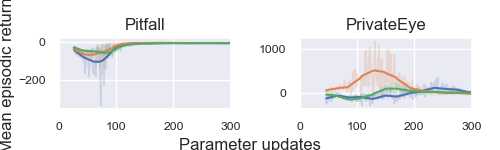

Done:logs/pitfall/rnd_baselineCnn_env32_seed4/progress.csv,rows:10257
Done:logs/pitfall/rnd_baselineCnn_env32_seed1/progress.csv,rows:10261
Done:logs/pitfall/rnd_baselineCnn_env32_seed0/progress.csv,rows:10255
Done:logs/pitfall/rnd_baselineCnn_env32_seed3/progress.csv,rows:10255
Done:logs/pitfall/rnd_baselineCnn_env32_seed2/progress.csv,rows:10258
Done:logs/pitfall/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10255
Done:logs/pitfall/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10256
Done:logs/pitfall/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10255
Done:logs/pitfall/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10255
Done:logs/pitfall/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10255
Done:logs/pitfall/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10255
Done:logs/pitfall/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows:10254
Done:logs/pitfall/l2nor/l2nor

/home/songyan/Program/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Done:logs/privateEye/rnd_baselineCnn_env32_seed4/progress.csv,rows:10265
Done:logs/privateEye/rnd_baselineCnn_env32_seed1/progress.csv,rows:10265
Done:logs/privateEye/rnd_baselineCnn_env32_seed0/progress.csv,rows:10265
Done:logs/privateEye/rnd_baselineCnn_env32_seed3/progress.csv,rows:10265
Done:logs/privateEye/rnd_baselineCnn_env32_seed2/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10265
Done:logs/privateEye/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows

In [114]:
def draw_two():
    log_dirs_list = [
#         ['logs/mtzm',
#         'logs/mtzm/l2nor'],
#         ['logs/gravitar',
#         'logs/gravitar/l2nor'],
        ['logs/pitfall',
        'logs/pitfall/l2nor'],
        ['logs/privateEye',
        'logs/privateEye/l2nor'],
#         ['logs/solaris',
#         'logs/solaris/l2nor'],
#         ['logs/venture',
#         'logs/venture/l2nor'],
    ]
#     all_df_data = pd.DataFrame()
    keys = ['eprew']
    for k in keys:
        fig, axs = plt.subplots((len(log_dirs_list)-1)//3 + 1, 2)
        fig.set_tight_layout(True)
        fig.set_size_inches(5, 1.5)
        sns.set(font_scale=1)
        
        for i, log_dirs in enumerate(log_dirs_list):
            df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'loss/auxloss_ab', 'eprew'], min_length=True)
            df_data.base_name = df_data.base_name.replace(run_name_map)
            check_num(df_data, 5)
#         all_df_data = pd.concat([all_df_data, df_data], ignore_index=True, sort=False)
            
#             tmp_x = np.arange(0, 10000, 100)
#             df_data = pd.DataFrame({'n_updates':tmp_x, k:[1]*len(tmp_x)})
#             ax = sns.lineplot(x='n_updates', y=k, ci=40, data=df_data, n_boot=1, ax=axs[i//3][i%3], legend=False)
            legend = False
            if i == 0:
                legend = "brief"
            ax = sns.lineplot(x='n_updates', y=k, hue='base_name', ci=40, data=df_data, ax=axs[i],legend=legend, n_boot=1)
    
            ax.set_title(game_name_map[log_dirs[0].split('/')[1]])
            ax.set(xlabel='', ylabel='')
            
            if i == 0:
                handles, labels = ax.get_legend_handles_labels()
                ax.get_legend().remove()
        
            ax.set(xlim=(0, 300))
        
        fig.text(0.5, 0.00, 'Parameter updates', ha='center')
        fig.text(0.00, 0.5, 'Mean episodic return', va='center', rotation='vertical')
#         fig.legend(handles=handles[1:], labels=labels[1:], ncol=len(labels[1:]), loc='upper center', bbox_to_anchor=(0.5, 1.085))
#         fig.subplots_adjust(top=0.7)

        fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/atari_reward2.pdf', bbox_inches='tight')

draw_two()

Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10259
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed1/progress.csv,rows:10268
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed4/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed4/progress.csv,rows:10257
Done:logs/mtzm/logits_ab/cnn_abc0.1_arrayAction0_env32_seed0/progress.csv,rows:10258
Done:logs/mtzm/logits_ab/cnn_abc0.1_arrayAction0_e

<IPython.core.display.Javascript object>


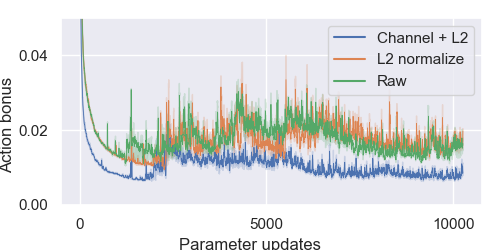

/home/songyan/Program/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [97]:
log_dirs = [
    'logs/mtzm',
    'logs/mtzm/l2nor',
#     'logs/mtzm/sdnor',
    'logs/mtzm/logits_ab',
]

def name_func(name):
    if 'run2' in name:
        return False
    return 'l2nor_allcol0.01_abc1_arrayAction1_env32' in name or 'l2nor_abc1_arrayAction0_env32' in name or 'cnn_abc0.1_arrayAction0_env32' in name
def draw_auxloss():
    keys = ['loss/auxloss_ab']
    df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'loss/auxloss_ab', 'eprew'], min_length=True, smooth_lenght=10)
#     df_data = df_data[~df_data.base_name.str.contains('rnd_baselineCnn_env32')]
    df_data.base_name = df_data.base_name.replace(run_name_map_entropy)
    check_num(df_data, 5)
    
    for k in keys:
        fig = plt.figure()
        fig.set_tight_layout(True)
#         fig.set_size_inches(5, 2.5)
#         fig.set_size_inches(3, 3.5)
        fig.set_size_inches(5, 2.5)
        sns.set(font_scale=1)

        ax = sns.lineplot(x='n_updates', y=k, hue='base_name', ci=40, data=df_data, linewidth=0.6)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles[1:], labels=labels[1:])
        ax.set(xlabel='', ylabel='')
        ax.set(ylim=(0, 0.05))
        ax.set(xticks=np.arange(0, 10250, 5000))
        ax.set(yticks=np.arange(0, 0.05, 0.02))
        
        fig.text(0.5, 0.00, 'Parameter updates', ha='center') # fontsize=13.5
        fig.text(0.00, 0.5, 'Action bonus', va='center', rotation='vertical')
        fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/action_bonus.pdf', bbox_inches='tight')

draw_auxloss()

Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed0/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed3/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed2/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed2/progress.csv,rows:10259
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed1/progress.csv,rows:10257
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed1/progress.csv,rows:10268
Done:logs/mtzm/l2nor/l2nor_allcol0.01_abc1_arrayAction1_env32_seed4/progress.csv,rows:10258
Done:logs/mtzm/l2nor/l2nor_abc1_arrayAction0_env32_seed4/progress.csv,rows:10257
Done:logs/mtzm/logits_ab/cnn_abc0.1_arrayAction0_env32_seed0/progress.csv,rows:10258
Done:logs/mtzm/logits_ab/cnn_abc0.1_arrayAction0_e

<IPython.core.display.Javascript object>


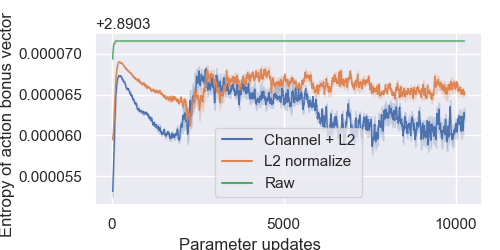

/home/songyan/Program/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [100]:
log_dirs = [
    'logs/mtzm',
    'logs/mtzm/l2nor',
#     'logs/mtzm/sdnor',
    'logs/mtzm/logits_ab',
]
def name_func(name):
    if 'run2' in name:
        return False
    return 'l2nor_allcol0.01_abc1_arrayAction1_env32' in name or 'l2nor_abc1_arrayAction0_env32' in name or 'cnn_abc0.1_arrayAction0_env32' in name

def draw_ab_entropy():
    keys = ['loss/entropy_ab']
    df_data = get_data(log_dirs, name_func, smooth_keys=['loss/entropy_ab', 'loss/auxloss_ab', 'eprew'], min_length=True, smooth_lenght=25)
    df_data.base_name = df_data.base_name.replace(run_name_map_entropy)    
    check_num(df_data, 5)
    
    for k in keys:
        fig = plt.figure()
        fig.set_tight_layout(True)
#         fig.set_size_inches(5, 2.5)
#         fig.set_size_inches(3, 3.5)
        fig.set_size_inches(5, 2.5)
        sns.set(font_scale=1)
        
        legend = True
        if legend:
            legend = "brief"
        
        
        ax = sns.lineplot(x='n_updates', y=k, hue='base_name', ci=40, data=df_data, linewidth=1, legend=legend)
        ax.set(xlabel='', ylabel='')
        ax.set(xticks=np.arange(0, 10250, 5000))
        
        if legend:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles=handles[1:], labels=labels[1:])
        
        fig.text(0.5, 0.00, 'Parameter updates', ha='center')
        fig.text(0.00, 0.5, 'Entropy of action bonus vector', va='center', rotation='vertical')
        fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/action_entropy.pdf', bbox_inches='tight')

draw_ab_entropy()

# Draw ends on *.log

<IPython.core.display.Javascript object>


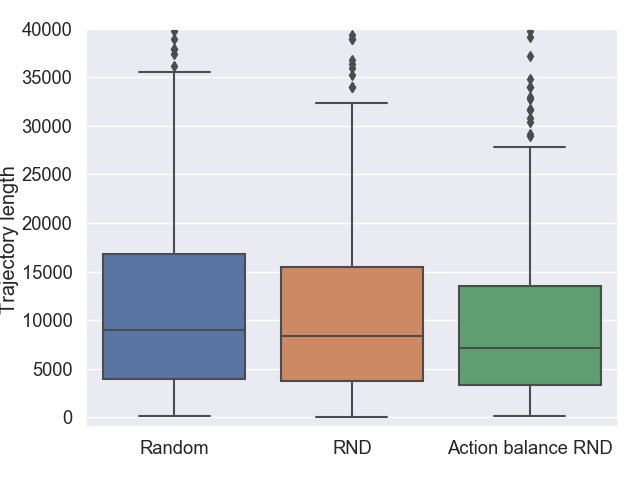

In [117]:
dir_path = '/home/songyan/Project/EI/atari/logs/discountIR'
names = [
    '40x40_msf32_acc1_src0.1-ep1_ends.log',
    '40x40_msf128_acc1_src0.1-src_ends.log',
    '40x40_msf128_acc1_src0.1-acc_src_ends.log',
    
]

name_map = {
    '40x40_msf32_acc1_src0.1-ep1_ends.log': 'Random',
    '40x40_msf128_acc1_src0.1-src_ends.log': 'RND',
    '40x40_msf128_acc1_src0.1-acc_src_ends.log': 'Action balance RND',
}

columns = ['name', 'end', 'length']
data_df = pd.DataFrame(columns=columns)
for name in names:
    datas = []
    for line in open(os.path.join(dir_path, name), 'r'):
        if 'total mean game length' in line:
            datas.append(ast.literal_eval(line.strip().split('\t')[-1]))
        elif 'ends:' in line:
            ends = line.strip().split(':')[-1].split('\t')
    
    for i in range(len(datas)):
        data_df = pd.concat([data_df, pd.DataFrame(list(zip([name] * len(datas[i]), [ends[i]] * len(datas[i]), datas[i])), columns=columns)], ignore_index=True)
data_df['length'] = data_df['length'].astype(int)
data_df.name = data_df.name.replace(name_map)

fig = plt.figure()
fig.set_tight_layout(True)

# ax = sns.violinplot(x="name", y="length", data=data_df)
ax = sns.boxplot(x="name", y="length", data=data_df)

new_labels = []
for item in ax.get_xticklabels():
    text = item.get_text()
    text = text.replace('40x40_', '')
    text = text.replace('noEnd_', '')
    text = text.replace('allActionInt_', '')
    
    split_index = len(text) // 2
    new_labels.append(text[:split_index] + '\n' + text[split_index:])
# ax.set_xticklabels(new_labels)
ax.set(ylim=(-1000, 40000))
ax.set(xlabel='', ylabel='')
fig.text(0.00, 0.5, 'Trajectory length', va='center', rotation='vertical')

fig.savefig('/home/songyan/Documents/project/exploration on action selection/实验结果记录/tmp.pdf', bbox_inches='tight')